In [1]:
import torch
import torch_geometric

print(torch.__version__)
print(torch_geometric.__version__)

1.13.1+cu116
2.1.0


In [2]:
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [3]:
class GATLayer(nn.Module):
    def __init__(self):
        super(GATLayer,self).__init__()

    def forward(self,input,adj):
        pass

In [4]:
in_features=5
out_features=2
nb_nodes=3

In [5]:
W=nn.Parameter(torch.zeros(size=(in_features,out_features)))
nn.init.xavier_normal_(W.data,gain=1.414)
print(W)

input=torch.rand(nb_nodes,in_features)
print(input)


Parameter containing:
tensor([[-0.0167,  1.0758],
        [-0.5520, -0.0468],
        [-0.8608, -0.6366],
        [-0.9014,  1.7466],
        [-0.5446,  0.1511]], requires_grad=True)
tensor([[0.1949, 0.0305, 0.1280, 0.9392, 0.8192],
        [0.1105, 0.0259, 0.2771, 0.0728, 0.5064],
        [0.0402, 0.2440, 0.9048, 0.8621, 0.3584]])


In [6]:
h=torch.mm(input,W)
print(h)
print(h.shape)

tensor([[-1.4230,  1.8909],
        [-0.5961,  0.1448],
        [-1.8865,  1.0157]], grad_fn=<MmBackward0>)
torch.Size([3, 2])


In [7]:
N=h.size()[0]
print(N)

3


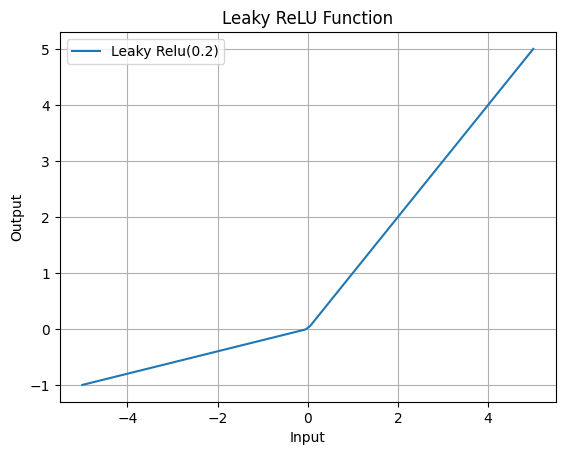

In [8]:
import matplotlib.pyplot as plt

def leaky_relu(x,negative_slop=0.2):
    return np.where(x>=0,x,negative_slop*x)

x=np.linspace(-5,5,100)
y=leaky_relu(x,negative_slop=0.2)
plt.plot(x,y,label="Leaky Relu(0.2)")
plt.title('Leaky ReLU Function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
a=nn.Parameter(torch.zeros(size=(2*out_features,1)))
nn.init.xavier_normal_(a.data,gain=1.414)
print(a.shape)

leaky_relu=nn.LeakyReLU(0.2)


torch.Size([4, 1])


In [10]:
print(h.repeat(3,1))
print(h.repeat(1,3))
print(h.repeat(3,3))


tensor([[-1.4230,  1.8909],
        [-0.5961,  0.1448],
        [-1.8865,  1.0157],
        [-1.4230,  1.8909],
        [-0.5961,  0.1448],
        [-1.8865,  1.0157],
        [-1.4230,  1.8909],
        [-0.5961,  0.1448],
        [-1.8865,  1.0157]], grad_fn=<RepeatBackward0>)
tensor([[-1.4230,  1.8909, -1.4230,  1.8909, -1.4230,  1.8909],
        [-0.5961,  0.1448, -0.5961,  0.1448, -0.5961,  0.1448],
        [-1.8865,  1.0157, -1.8865,  1.0157, -1.8865,  1.0157]],
       grad_fn=<RepeatBackward0>)
tensor([[-1.4230,  1.8909, -1.4230,  1.8909, -1.4230,  1.8909],
        [-0.5961,  0.1448, -0.5961,  0.1448, -0.5961,  0.1448],
        [-1.8865,  1.0157, -1.8865,  1.0157, -1.8865,  1.0157],
        [-1.4230,  1.8909, -1.4230,  1.8909, -1.4230,  1.8909],
        [-0.5961,  0.1448, -0.5961,  0.1448, -0.5961,  0.1448],
        [-1.8865,  1.0157, -1.8865,  1.0157, -1.8865,  1.0157],
        [-1.4230,  1.8909, -1.4230,  1.8909, -1.4230,  1.8909],
        [-0.5961,  0.1448, -0.5961,  0.1448, 

In [11]:
torch.cat([h.repeat(1,N).view(N*N,-1),h.repeat(N,1)],dim=1)


tensor([[-1.4230,  1.8909, -1.4230,  1.8909],
        [-1.4230,  1.8909, -0.5961,  0.1448],
        [-1.4230,  1.8909, -1.8865,  1.0157],
        [-0.5961,  0.1448, -1.4230,  1.8909],
        [-0.5961,  0.1448, -0.5961,  0.1448],
        [-0.5961,  0.1448, -1.8865,  1.0157],
        [-1.8865,  1.0157, -1.4230,  1.8909],
        [-1.8865,  1.0157, -0.5961,  0.1448],
        [-1.8865,  1.0157, -1.8865,  1.0157]], grad_fn=<CatBackward0>)

In [12]:
a_input=torch.cat([h.repeat(1,N).view(N*N,-1),h.repeat(N,1)],dim=1).view(N, -1, 2 * out_features)
print(a_input)
print(a_input.shape)

tensor([[[-1.4230,  1.8909, -1.4230,  1.8909],
         [-1.4230,  1.8909, -0.5961,  0.1448],
         [-1.4230,  1.8909, -1.8865,  1.0157]],

        [[-0.5961,  0.1448, -1.4230,  1.8909],
         [-0.5961,  0.1448, -0.5961,  0.1448],
         [-0.5961,  0.1448, -1.8865,  1.0157]],

        [[-1.8865,  1.0157, -1.4230,  1.8909],
         [-1.8865,  1.0157, -0.5961,  0.1448],
         [-1.8865,  1.0157, -1.8865,  1.0157]]], grad_fn=<ViewBackward0>)
torch.Size([3, 3, 4])


In [13]:
e=leaky_relu(torch.matmul(a_input,a)).squeeze(2)
print(e)
print(e.shape)

tensor([[ 1.6168,  0.8792,  0.4030],
        [ 0.5373, -0.0401, -0.1353],
        [ 1.3356,  0.5979,  0.1218]], grad_fn=<SqueezeBackward1>)
torch.Size([3, 3])


In [14]:
print(torch.matmul(a_input,a))
print(torch.matmul(a_input,a).squeeze(2))

tensor([[[ 1.6168],
         [ 0.8792],
         [ 0.4030]],

        [[ 0.5373],
         [-0.2003],
         [-0.6765]],

        [[ 1.3356],
         [ 0.5979],
         [ 0.1218]]], grad_fn=<UnsafeViewBackward0>)
tensor([[ 1.6168,  0.8792,  0.4030],
        [ 0.5373, -0.2003, -0.6765],
        [ 1.3356,  0.5979,  0.1218]], grad_fn=<SqueezeBackward1>)


In [15]:
torch.manual_seed(16)
adj=torch.randint(2,(3,3))

zero_vec=-9e15*torch.ones_like(e)
print(adj)
print(zero_vec)

tensor([[1, 0, 1],
        [1, 1, 1],
        [0, 1, 1]])
tensor([[-9.0000e+15, -9.0000e+15, -9.0000e+15],
        [-9.0000e+15, -9.0000e+15, -9.0000e+15],
        [-9.0000e+15, -9.0000e+15, -9.0000e+15]])


In [16]:
attention=torch.where(adj>0,e,zero_vec)
print(adj)
print(e)
print(zero_vec)
print(attention)

tensor([[1, 0, 1],
        [1, 1, 1],
        [0, 1, 1]])
tensor([[ 1.6168,  0.8792,  0.4030],
        [ 0.5373, -0.0401, -0.1353],
        [ 1.3356,  0.5979,  0.1218]], grad_fn=<SqueezeBackward1>)
tensor([[-9.0000e+15, -9.0000e+15, -9.0000e+15],
        [-9.0000e+15, -9.0000e+15, -9.0000e+15],
        [-9.0000e+15, -9.0000e+15, -9.0000e+15]])
tensor([[ 1.6168e+00, -9.0000e+15,  4.0302e-01],
        [ 5.3730e-01, -4.0069e-02, -1.3530e-01],
        [-9.0000e+15,  5.9792e-01,  1.2175e-01]], grad_fn=<WhereBackward0>)


In [17]:
attention=F.softmax(attention,dim=1)
h_prime=torch.matmul(attention,h)

In [18]:
attention


tensor([[0.7710, 0.0000, 0.2290],
        [0.4827, 0.2710, 0.2464],
        [0.0000, 0.6168, 0.3832]], grad_fn=<SoftmaxBackward0>)

In [19]:
h_prime

tensor([[-1.5292,  1.6904],
        [-1.3131,  1.2021],
        [-1.0905,  0.4785]], grad_fn=<MmBackward0>)

In [20]:
print(h_prime, "\n", h)

tensor([[-1.5292,  1.6904],
        [-1.3131,  1.2021],
        [-1.0905,  0.4785]], grad_fn=<MmBackward0>) 
 tensor([[-1.4230,  1.8909],
        [-0.5961,  0.1448],
        [-1.8865,  1.0157]], grad_fn=<MmBackward0>)


In [21]:
class GATLayer(nn.Module):
    def __init__(self,in_features,out_features,dropout,alpha):
        super(GATLayer,self).__init__()
        self.dropout=dropout
        self.in_features=in_features
        self.out_features=out_features
        self.alpha=alpha

        self.W=nn.Parameter(torch.zeros(size=(in_features,out_features)))
        nn.init.xavier_normal_(self.W.data,gain=1.414)

        self.a=nn.Parameter(torch.zeros(size=(2*out_features,1)))
        nn.init.xavier_normal_(self.a.data,gain=1.414)

        self.leakyrelu=nn.LeakyReLU(self.alpha)

    def forward(self,input,adj):
        h=torch.mm(input,self.W)
        N=h.size()[0]

        a_input=torch.cat([h.repeat(1,N).view(N*N,-1),h.repeat(N,1)],dim=1).view(N,-1,2*self.out_features)
        e=self.leakyrelu(torch.matmul(a_input,self.a).squeeze(2))

        zero_vec=-9e15*torch.ones_like(e)
        attention=torch.where(adj>0,e,zero_vec)

        attention=F.softmax(attention,self.dropout,training=self.training)
        h_prime=torch.matmul(attention,h)

        return h_prime
    

In [22]:
from torch_geometric.datasets import Planetoid
from torch_geometric.transforms import NormalizeFeatures

dataset=Planetoid(root="data/Planetoid",name='Cora',transform=NormalizeFeatures())
data=dataset[0]
print(dataset)
print(data)

Cora()
Data(x=[2708, 1433], edge_index=[2, 10556], y=[2708], train_mask=[2708], val_mask=[2708], test_mask=[2708])


In [23]:
import torch.nn as nn
from torch_geometric.nn import GCNConv

class GCN(nn.Module):
    def __init__(self,output_channels=7):
        super(GCN,self).__init__()
        self.conv1=GCNConv(1433,64)
        self.conv2=GCNConv(64,output_channels)

        self.dp=nn.Dropout(p=0.5)

    def forward(self,x,edge_index):
        x=self.conv1(x,edge_index)
        x=F.relu(x)

        x=self.dp(x)

        return x
    

model=GCN()
print(model)

total_params=sum(p.numel() for p in model.parameters() if p.requires_grad)
print(total_params)

GCN(
  (conv1): GCNConv(1433, 64)
  (conv2): GCNConv(64, 7)
  (dp): Dropout(p=0.5, inplace=False)
)
92231


In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
data  = data.to(device)

optimizer = optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss()

for epoch in range(200):        
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)        
    loss = criterion(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        pred = out.argmax(dim=1)
        train_correct = (pred[data.train_mask] == data.y[data.train_mask]).sum()
        train_acc = int(train_correct) / int(data.train_mask.sum())

    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        pred = out.argmax(dim=1)
        test_correct = (pred[data.test_mask] == data.y[data.test_mask]).sum()
        test_acc = int(test_correct) / int(data.test_mask.sum())

    if epoch % 10 == 0:
        print(f'Epoch {epoch:03d}  Loss {loss:.4f}  Train Acc {train_acc:.4f}  Test Acc {test_acc:.4f}')

Epoch 000  Loss 4.1583  Train Acc 0.0286  Test Acc 0.2530
Epoch 010  Loss 3.9941  Train Acc 0.4929  Test Acc 0.5620
Epoch 020  Loss 3.7906  Train Acc 0.5714  Test Acc 0.6000
Epoch 030  Loss 3.6173  Train Acc 0.5786  Test Acc 0.6120
Epoch 040  Loss 3.5548  Train Acc 0.5000  Test Acc 0.6210
Epoch 050  Loss 3.3784  Train Acc 0.5143  Test Acc 0.6470
Epoch 060  Loss 3.2690  Train Acc 0.5143  Test Acc 0.6670
Epoch 070  Loss 3.1924  Train Acc 0.5000  Test Acc 0.6800
Epoch 080  Loss 2.9517  Train Acc 0.5571  Test Acc 0.6990
Epoch 090  Loss 2.8610  Train Acc 0.5643  Test Acc 0.7100
Epoch 100  Loss 3.0477  Train Acc 0.4714  Test Acc 0.7220
Epoch 110  Loss 2.8057  Train Acc 0.5357  Test Acc 0.7380
Epoch 120  Loss 2.9254  Train Acc 0.4786  Test Acc 0.7450
Epoch 130  Loss 2.6574  Train Acc 0.5500  Test Acc 0.7470
Epoch 140  Loss 2.5987  Train Acc 0.5500  Test Acc 0.7440
Epoch 150  Loss 2.8462  Train Acc 0.4786  Test Acc 0.7440
Epoch 160  Loss 2.8058  Train Acc 0.4643  Test Acc 0.7450
Epoch 170  Los

In [25]:
import torch.nn as nn
from torch_geometric.nn import GATConv
class GAT(nn.Module):
    def __init__(self,output_channels=7):
        super(GAT,self).__init__()

        self.conv1=GATConv(1433,64,heads=4,concat=False,negative_slope=0.4,dropout=0.2)
        self.conv2=GATConv(64,output_channels,heads=1,concat=False,negative_slope=0.2,dropout=0.1)

        self.dp=nn.Dropout(p=0.5)

    def forward(self,x,edge_index):
        x=F.relu(self.conv1(x,edge_index))

        x=self.dp(self.conv2(x,edge_index))

        return x

model=GAT()
print(model)

total_params=sum(p.numel() for p in model.parameters() if p.requires_grad)
print(total_params)





GAT(
  (conv1): GATConv(1433, 64, heads=4)
  (conv2): GATConv(64, 7, heads=1)
  (dp): Dropout(p=0.5, inplace=False)
)
367893


In [26]:
import torch.optim as optim
import torch.nn.functional as F

devcie=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model=model.to(device)
opitmizer=optim.Adam(model.parameters(),lr=0.01,weight_decay=1e-5)
criterion=nn.CrossEntropyLoss(reduction="mean")

data=data.to(device)

for epoch in range(200):
    model.train()
    optimizer.zero_grad()
    out=model(data.x,data.edge_index)
    loss=criterion(out[data.train_mask],data.y[data.train_mask])
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        pred=out.argmax(dim=1)
        train_correct=(pred[data.train_mask]==data.y[data.train_mask]).sum()
        train_acc=int(train_correct)/int(data.train_mask.sum())

    model.eval()
    with torch.no_grad():
        out=model(data.x,data.edge_index)
        pred=out.argmax(dim=1)
        test_correct=(pred[data.test_mask]==data.y[data.test_mask]).sum()
        test_acc=int(test_correct)//int(data.test_mask.sum())

    if epoch%10==0:
         print(f'Epoch {epoch:03d}  Loss {loss:.4f}  Train Acc {train_acc:.4f}  Test Acc {test_acc:.4f}')

Epoch 000  Loss 1.9461  Train Acc 0.1714  Test Acc 0.0000
Epoch 010  Loss 1.9457  Train Acc 0.2000  Test Acc 0.0000
Epoch 020  Loss 1.9458  Train Acc 0.1929  Test Acc 0.0000
Epoch 030  Loss 1.9459  Train Acc 0.2071  Test Acc 0.0000
Epoch 040  Loss 1.9459  Train Acc 0.1429  Test Acc 0.0000
Epoch 050  Loss 1.9456  Train Acc 0.1571  Test Acc 0.0000
Epoch 060  Loss 1.9454  Train Acc 0.1786  Test Acc 0.0000
Epoch 070  Loss 1.9455  Train Acc 0.1714  Test Acc 0.0000
Epoch 080  Loss 1.9460  Train Acc 0.1429  Test Acc 0.0000
Epoch 090  Loss 1.9457  Train Acc 0.1643  Test Acc 0.0000
Epoch 100  Loss 1.9456  Train Acc 0.2000  Test Acc 0.0000
Epoch 110  Loss 1.9455  Train Acc 0.1786  Test Acc 0.0000
Epoch 120  Loss 1.9457  Train Acc 0.1429  Test Acc 0.0000
Epoch 130  Loss 1.9456  Train Acc 0.1714  Test Acc 0.0000
Epoch 140  Loss 1.9454  Train Acc 0.2214  Test Acc 0.0000
Epoch 150  Loss 1.9457  Train Acc 0.1714  Test Acc 0.0000
Epoch 160  Loss 1.9453  Train Acc 0.2000  Test Acc 0.0000
Epoch 170  Los